In [1]:
import numpy as np
import pandas as pd

Import Data

source: Maven Analytics

In [2]:
#load all data

In [5]:
try:
    calendar_df = pd.read_csv('calendar.csv')
    data_dictionary_df = pd.read_csv('data_dictionary.csv')
    inventory_df = pd.read_csv('inventory.csv')
    products_df = pd.read_csv('products.csv')
    sales_df = pd.read_csv('sales.csv')
    stores_df = pd.read_csv('stores.csv')

except Exception as e:
    print(f"An error occurred: {e}")

In [6]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store_ID         50 non-null     int64 
 1   Store_Name       50 non-null     object
 2   Store_City       50 non-null     object
 3   Store_Location   50 non-null     object
 4   Store_Open_Date  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [7]:
#data cleaning

In [8]:
products_df['Product_Cost'] = products_df['Product_Cost'].replace({'\$': '', ' ': ''}, regex=True).astype(float)
products_df['Product_Price'] = products_df['Product_Price'].replace({'\$': '', ' ': ''}, regex=True).astype(float)

In [9]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
calendar_df['Date'] = pd.to_datetime(calendar_df['Date'])
stores_df['Store_Open_Date'] = pd.to_datetime(stores_df['Store_Open_Date'])

In [10]:
merged_df = sales_df.copy()

In [12]:
merged_df = pd.merge(merged_df, products_df, on='Product_ID', how='left')
print(f"Shape after merging products: {merged_df.shape}")

Shape after merging products: (829262, 9)


In [13]:
merged_df = pd.merge(merged_df, stores_df, on='Store_ID', how='left')
print(f"Shape after merging stores: {merged_df.shape}")

Shape after merging stores: (829262, 13)


In [14]:
if len(calendar_df.columns) > 1:
        merged_df = pd.merge(merged_df, calendar_df, on='Date', how='left')
        print(f"Shape after merging calendar: {merged_df.shape}")
else:
    print("Skipping calendar merge as it only contains the 'Date' key.")

Skipping calendar merge as it only contains the 'Date' key.


In [15]:
output_filename = 'combined_sales_data.csv'
merged_df.to_csv(output_filename, index=False)
print(f"\nSuccessfully created {output_filename} with {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")
print("\nFinal combined data info:")
merged_df.info()


Successfully created combined_sales_data.csv with 829262 rows and 13 columns.

Final combined data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           829262 non-null  int64         
 1   Date              829262 non-null  datetime64[ns]
 2   Store_ID          829262 non-null  int64         
 3   Product_ID        829262 non-null  int64         
 4   Units             829262 non-null  int64         
 5   Product_Name      829262 non-null  object        
 6   Product_Category  829262 non-null  object        
 7   Product_Cost      829262 non-null  float64       
 8   Product_Price     829262 non-null  float64       
 9   Store_Name        829262 non-null  object        
 10  Store_City        829262 non-null  object        
 11  Store_Location    829262 non-null  object        
 12  Store_Op

In [17]:
merged_df.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2022-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2022-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2022-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2022-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2022-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27


In [19]:
merged_df

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2022-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2022-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2022-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2022-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2022-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2023-09-30,24,19,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
829258,829259,2023-09-30,16,35,1,Uno Card Game,Games,3.99,7.99,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19
829259,829260,2023-09-30,22,19,1,Magic Sand,Art & Crafts,13.99,15.99,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29
829260,829261,2023-09-30,13,2,2,Animal Figures,Toys,9.99,12.99,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30


In [21]:
merged_df.isnull().sum()

Sale_ID             0
Date                0
Store_ID            0
Product_ID          0
Units               0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
dtype: int64

In [22]:
df = merged_df

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.describe()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Cost,Product_Price,Store_Open_Date
count,829262.000000,829262,829262.000000,829262.000000,829262.000000,829262.000000,829262.000000,829262
mean,414631.500000,2022-12-10 22:14:40.102067456,25.277034,15.014149,1.315103,9.976460,13.772327,2009-08-22 16:51:08.019516416
min,1.000000,2022-01-01 00:00:00,1.000000,1.000000,1.000000,1.990000,2.990000,1992-09-18 00:00:00
25%,207316.250000,2022-07-09 00:00:00,13.000000,6.000000,1.000000,3.990000,6.990000,2006-08-30 00:00:00
50%,414631.500000,2022-12-28 00:00:00,26.000000,14.000000,1.000000,7.990000,12.990000,2010-09-15 00:00:00
75%,621946.750000,2023-05-13 00:00:00,38.000000,24.000000,1.000000,11.990000,15.990000,2014-03-18 00:00:00
max,829262.000000,2023-09-30 00:00:00,50.000000,35.000000,30.000000,34.990000,39.990000,2016-05-18 00:00:00
std,239387.463803,NaN,14.352573,9.869417,0.830701,7.817749,8.664794,NaN


EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sns.set_style("whitegrid")

In [28]:
try:
    df = pd.read_csv('combined_sales_data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df['Store_Open_Date'] = pd.to_datetime(df['Store_Open_Date'])
    
    print("data loaded.")
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

except FileNotFoundError:
    print("Error")

data loaded.
Dataset has 829262 rows and 13 columns.


In [29]:
# Calculate Revenue and Profit
df['Revenue'] = df['Units'] * df['Product_Price']
df['Profit'] = df['Revenue'] - (df['Units'] * df['Product_Cost'])

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month_Year'] = df['Date'].dt.to_period('M') # e.g., '2022-01'
df['DayOfWeek'] = df['Date'].dt.day_name()

print("New columns added: Revenue, Profit, Year, Month_Year, DayOfWeek")
print("\nSample of data with new columns:")
print(df[['Sale_ID', 'Revenue', 'Profit', 'Month_Year', 'DayOfWeek']].head())

New columns added: Revenue, Profit, Year, Month_Year, DayOfWeek

Sample of data with new columns:
   Sale_ID  Revenue  Profit Month_Year DayOfWeek
0        1    12.99     3.0    2022-01  Saturday
1        2    15.99     6.0    2022-01  Saturday
2        3     6.99     3.0    2022-01  Saturday
3        4    15.99     4.0    2022-01  Saturday
4        5    39.99     5.0    2022-01  Saturday


In [30]:
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
total_units_sold = df['Units'].sum()

print("--- High-Level Business Metrics ---")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit:  ${total_profit:,.2f}")
print(f"Total Units Sold: {total_units_sold:,}")

--- High-Level Business Metrics ---
Total Revenue: $14,444,572.35
Total Profit:  $4,014,029.00
Total Units Sold: 1,090,565


In [31]:
print("Summary Statistics for Key Columns")
print(df[['Units', 'Product_Price', 'Product_Cost', 'Revenue', 'Profit']].describe())

Summary Statistics for Key Columns
               Units  Product_Price   Product_Cost        Revenue  \
count  829262.000000  829262.000000  829262.000000  829262.000000   
mean        1.315103      13.772327       9.976460      17.418587   
std         0.830701       8.664794       7.817749      15.522069   
min         1.000000       2.990000       1.990000       2.990000   
25%         1.000000       6.990000       3.990000       8.990000   
50%         1.000000      12.990000       7.990000      14.990000   
75%         1.000000      15.990000      11.990000      19.990000   
max        30.000000      39.990000      34.990000     879.780000   

              Profit  
count  829262.000000  
mean        4.840483  
std         4.476390  
min         1.000000  
25%         2.000000  
50%         4.000000  
75%         6.000000  
max       150.000000  


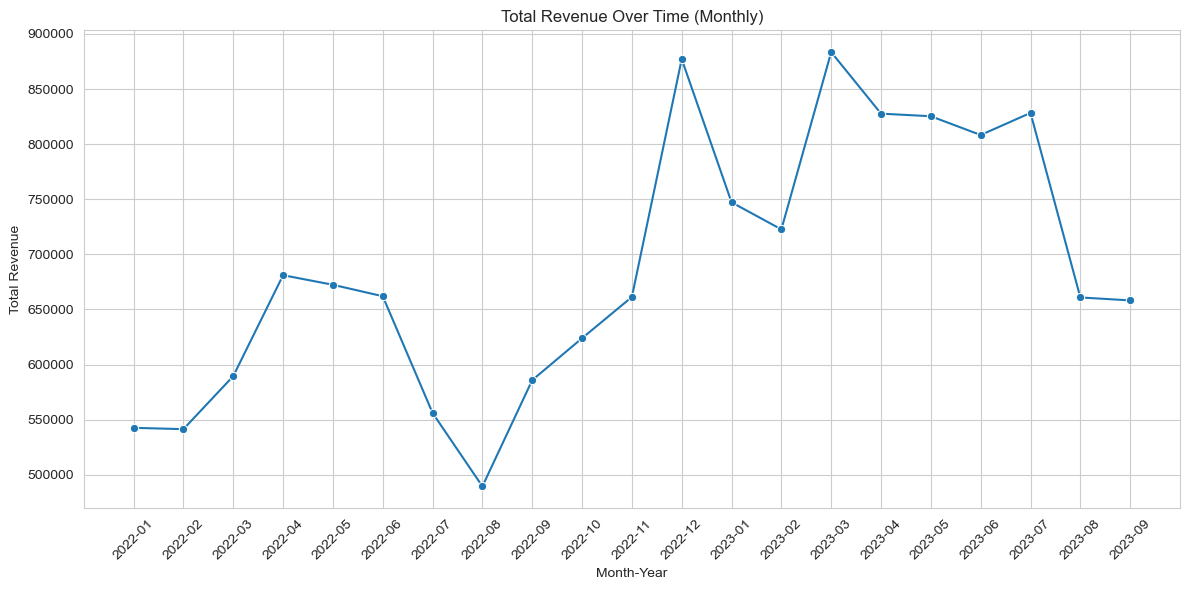

In [32]:
# Group by month-year and sum revenue
monthly_revenue = df.groupby('Month_Year')['Revenue'].sum().reset_index()
monthly_revenue['Month_Year'] = monthly_revenue['Month_Year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month_Year', y='Revenue', marker='o')
plt.title('Total Revenue Over Time (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_67891/2103271293.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='Revenue', y='Product_Category', palette='viridis')


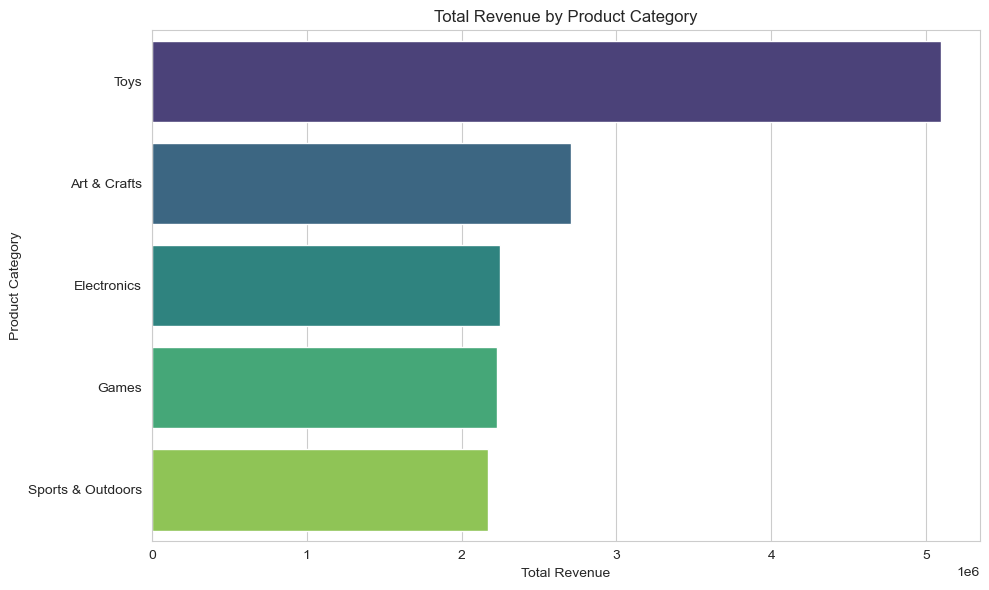

In [33]:
# Group by category and sum revenue
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_revenue, x='Revenue', y='Product_Category', palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_67891/1904091104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='Revenue', y='Product_Name', palette='plasma')


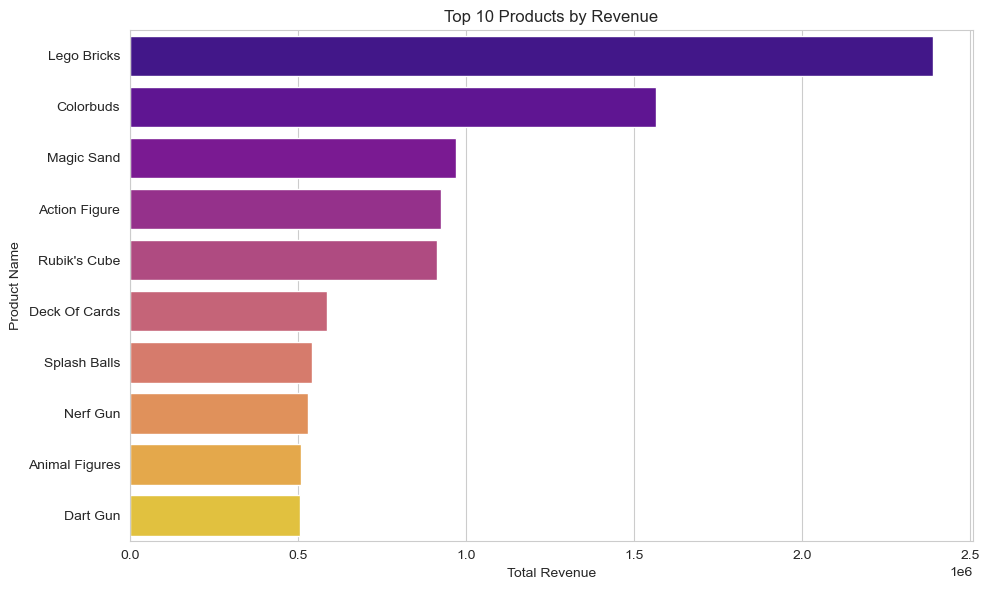

In [34]:
# Group by product name and sum revenue
top_10_products = df.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, x='Revenue', y='Product_Name', palette='plasma')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_67891/1134623428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_stores, x='Revenue', y='Store_Name', palette='cubehelix')


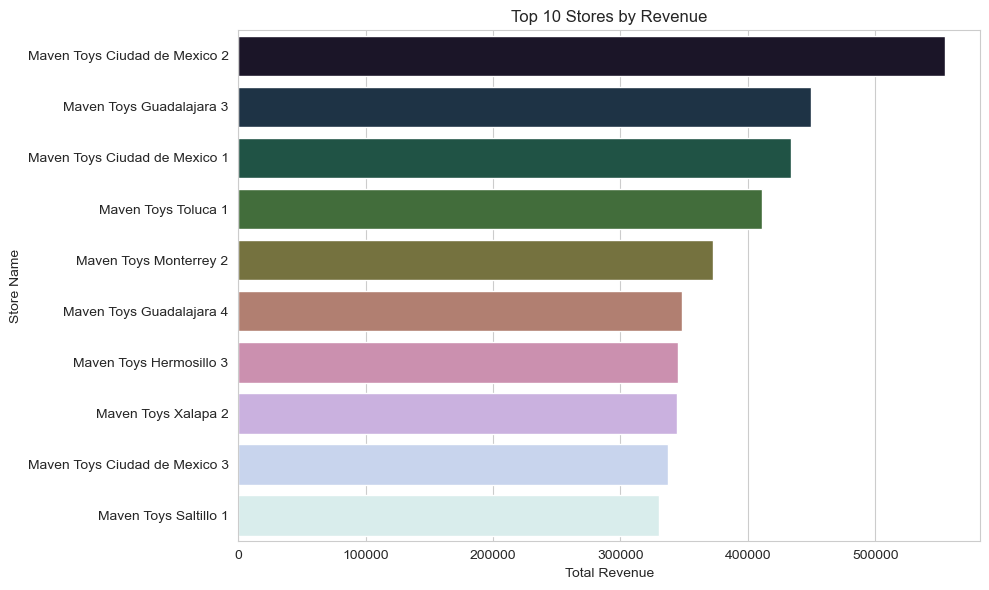

In [35]:
# Group by store name and sum revenue
top_10_stores = df.groupby('Store_Name')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_stores, x='Revenue', y='Store_Name', palette='cubehelix')
plt.title('Top 10 Stores by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Store Name')
plt.tight_layout()
plt.show()

/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_67891/1955440647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_revenue, x='Revenue', y='Store_City', palette='Paired')


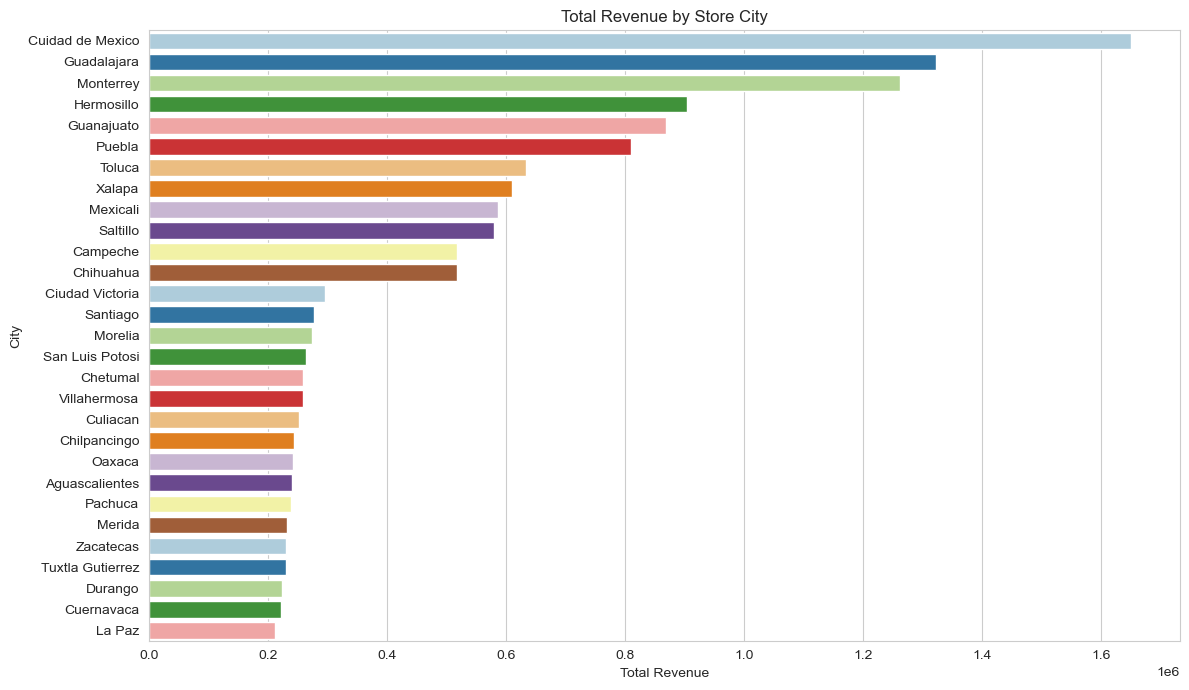

In [36]:
# Group by store city and sum revenue
city_revenue = df.groupby('Store_City')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=city_revenue, x='Revenue', y='Store_City', palette='Paired')
plt.title('Total Revenue by Store City')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()

/var/folders/t7/ysyk1bxd7sjgcsxwz34swgf40000gn/T/ipykernel_67891/1891857636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_revenue, x='DayOfWeek', y='Revenue', order=day_order, palette='twilight')


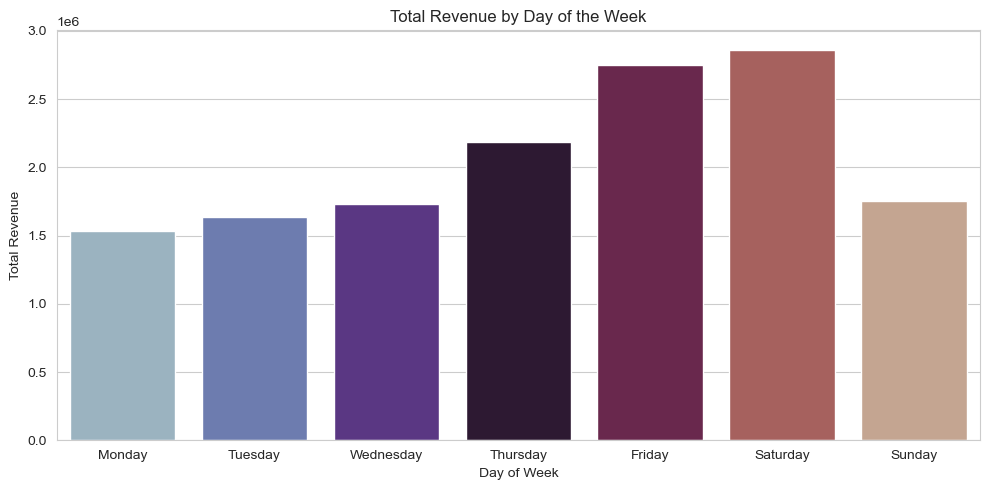

In [37]:
# Group by day of week and sum revenue
day_revenue = df.groupby('DayOfWeek')['Revenue'].sum().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.barplot(data=day_revenue, x='DayOfWeek', y='Revenue', order=day_order, palette='twilight')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()